In [5]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


In [6]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [7]:
df = pd.read_csv('/kaggle/input/mnist-in-csv/mnist_train.csv')
df.head()

label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]

In [8]:
df.shape

(60000, 785)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, label to 28x28
dtypes: int64(785)
memory usage: 359.3 MB


In [10]:
df.describe()

label      1x1      1x2      1x3      1x4      1x5      1x6  \
count  60000.000000  60000.0  60000.0  60000.0  60000.0  60000.0  60000.0   
mean       4.453933      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.889270      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

           1x7      1x8      1x9  ...         28x19         28x20  \
count  60000.0  60000.0  60000.0  ...  60000.000000  60000.000000   
mean       0.0      0.0      0.0  ...      0.200433      0.088867   
std        0.0      0.0      0.0  ...      6.042472      3.956189   
min        0.0      0.0      0.0  ...      0.000000      0.000000   
25%        0.0      0.0      0.0  ...      0.000000      0.000000   
50%        0.0      0.0      0.0  ...      0.000000      0.000000   
75%        0.0      0.0      0.0  ...      0.000000      0.000000   
max        0.0      0.0      0.0  ...    254.000000    254.000000   

              28x21         28x22         28x23       28x24    28x25    28x26  \
count  60000.000000  60000.000000  60000.000000  60000.0000  60000.0  60000.0   
mean       0.045633      0.019283      0.015117      0.0020      0.0      0.0   
std        2.839845      1.686770      1.678283      0.3466      0.0      0.0   
min        0.000000      0.000000      0.000000      0.0000      0.0      0.0   
25%        0.000000      0.000000      0.000000      0.0000      0.0      0.0   
50%        0.000000      0.000000      0.000000      0.0000      0.0      0.0   
75%        0.000000      0.000000      0.000000      0.0000      0.0      0.0   
max      253.000000    253.000000    254.000000     62.0000      0.0      0.0   

         28x27    28x28  
count  60000.0  60000.0  
mean       0.0      0.0  
std        0.0      0.0  
min        0.0      0.0  
25%        0.0      0.0  
50%        0.0      0.0  
75%        0.0      0.0  
max        0.0      0.0  

[8 rows x 785 columns]

In [11]:
df.isnull().sum()

label    0
1x1      0
1x2      0
1x3      0
1x4      0
        ..
28x24    0
28x25    0
28x26    0
28x27    0
28x28    0
Length: 785, dtype: int64

In [12]:
# df.sample returns a random sample of our dataset then .index gives the index and .values extract the index values
samp = df.sample().index.values
samp

array([23116])

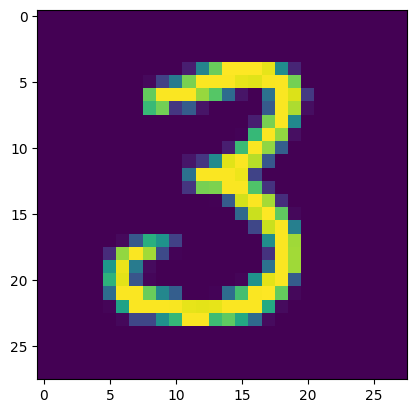

In [13]:
# Show the image on row 433660. we need .values to extract the values as our data is in DF
plt.imshow(df.iloc[samp, 1:].values.reshape(28, 28))

In [14]:
df.iloc[9572, 0]

2

In [15]:
# target
y = df.loc[:, 'label']

# features
X = df.iloc[:, 1:]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
X_train.shape, y_train.shape

((48000, 784), (48000,))

In [18]:
# import time and calculate the time taken to make predictions
import time

model = KNeighborsClassifier()
model.fit(X_train, y_train)
start = time.time()
pred = model.predict(X_test)
print(f"Time taken for prediction:", time.time() - start)
score = accuracy_score(y_test, pred)
print(f"Accuracy Score:", score)

Time taken for prediction: 28.86835503578186
Accuracy Score: 0.9715


In [19]:
# Now, we'll try to get around same accuracy with less no. of columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
# using PCA
pca = PCA(n_components=20)
X_train_transf = pca.fit_transform(X_train)
X_test_transf = pca.transform(X_test)

In [21]:
# make predictions now 
knc = KNeighborsClassifier()
knc.fit(X_train_transf, y_train)
preds = knc.predict(X_test_transf)
acc = accuracy_score(y_test, preds)
print(f"Accuracy Score: {acc}")

Accuracy Score: 0.9489166666666666


In [22]:
# finding the optimal value of n_components that produces higher accuracy
for i in range(1, 784):
    pca = PCA(n_components=i)
    X_train_transf = pca.fit_transform(X_train)
    X_test_transf = pca.transform(X_test)

    knc = KNeighborsClassifier()
    knc.fit(X_train_transf, y_train)
    preds = knc.predict(X_test_transf)
    acc = accuracy_score(y_test, preds)
    print(f"Accuracy Score with n_components {i}: {acc}")

Accuracy Score with n_components 1: 0.26358333333333334
Accuracy Score with n_components 2: 0.317
Accuracy Score with n_components 3: 0.5074166666666666
Accuracy Score with n_components 4: 0.6636666666666666
Accuracy Score with n_components 5: 0.74025
Accuracy Score with n_components 6: 0.8255
Accuracy Score with n_components 7: 0.8381666666666666
Accuracy Score with n_components 8: 0.8725
Accuracy Score with n_components 9: 0.8855
Accuracy Score with n_components 10: 0.9085
Accuracy Score with n_components 11: 0.91575
Accuracy Score with n_components 12: 0.9199166666666667
Accuracy Score with n_components 13: 0.9273333333333333
Accuracy Score with n_components 14: 0.93625
Accuracy Score with n_components 15: 0.9405
Accuracy Score with n_components 16: 0.9415
Accuracy Score with n_components 17: 0.9430833333333334
Accuracy Score with n_components 18: 0.9445
Accuracy Score with n_components 19: 0.9471666666666667
Accuracy Score with n_components 20: 0.95
Accuracy Score with n_components

KeyboardInterrupt: 

In [23]:
# Visualizing in 2D
pca2 = PCA(n_components=2)
X_train_transf2 = pca2.fit_transform(X_train)
X_test_transf2 = pca2.transform(X_test)

In [24]:
X_train_transf2

array([[ -0.04281917,  -1.92195074],
       [  8.15973973,  -4.49558064],
       [ -7.50490383,  -3.71938352],
       ...,
       [ 10.27729899,  -9.28671701],
       [ 10.29734578, -12.41249555],
       [ -2.87739201,  -0.812062  ]])

In [34]:
import plotly.express as px
y_train_transf2 = y_train.astype(str)
fig = px.scatter(x=X_train_transf2[:, 0],
         y=X_train_transf2[:, 1], 
                 color=y_train_transf2,
        color_discrete_sequence=px.colors.qualitative.G10
                 
                )
fig.show()

In [42]:
# visualization on 3D
pca3 = PCA(n_components=3)
X_train_transf3 = pca3.fit_transform(X_train)
X_test_transf3 = pca3.transform(X_test)

In [46]:
X_train_transf3

array([[ -0.04282686,  -1.92315197,  -2.49864626],
       [  8.15960136,  -4.49708124,  -4.7394889 ],
       [ -7.50490233,  -3.71818784,   5.13358845],
       ...,
       [ 10.27731816,  -9.2862356 ,  -1.8270099 ],
       [ 10.29728863, -12.41266562,   3.29389876],
       [ -2.87743496,  -0.81213305,  -1.44786195]])

In [45]:
clf = KNeighborsClassifier()
clf.fit(X_train_transf3, y_train)
pred3 = clf.predict(X_test_transf3)
accuracy_score(y_test, pred3)

0.5071666666666667

In [51]:
y_train_transf3 = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_transf3[:, 0],
                y=X_train_transf3[:, 1],
                z=X_train_transf3[:, 2],
                color=y_train_transf3)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",
)

fig.show()

In [55]:
# Eigen values i.e, lambda
pca3.explained_variance_ 

array([40.65780534, 29.35286711, 26.72542088])

In [62]:
pca3.components_.shape

(3, 3)

In [63]:
pca3.explained_variance_ratio_

array([0.42029613, 0.30343242, 0.27627145])

In [64]:
# Finding the optimum no. of principle components
optimal_pca = PCA(n_components=None)
X_train_transf4 = optimal_pca.fit_transform(X_train)
X_test_transf4 = optimal_pca.transform(X_test)

In [65]:
X_train_transf4.shape

(48000, 784)

In [69]:
optimal_pca.explained_variance_ratio_

array([5.70223819e-02, 4.11672592e-02, 3.74822816e-02, 2.90261081e-02,
       2.52770908e-02, 2.20430380e-02, 1.94366666e-02, 1.75441305e-02,
       1.54921137e-02, 1.40861433e-02, 1.34589075e-02, 1.21529957e-02,
       1.12251067e-02, 1.10229177e-02, 1.03419090e-02, 1.00206787e-02,
       9.48683702e-03, 9.24555612e-03, 8.96926898e-03, 8.75521045e-03,
       8.39827016e-03, 8.12418892e-03, 7.68547028e-03, 7.46772523e-03,
       7.20298951e-03, 6.93679776e-03, 6.87722142e-03, 6.64164642e-03,
       6.33750495e-03, 6.16945026e-03, 6.04647249e-03, 5.91711121e-03,
       5.73069428e-03, 5.69680239e-03, 5.60809719e-03, 5.39451157e-03,
       5.35154796e-03, 5.23852071e-03, 5.13788933e-03, 4.84055149e-03,
       4.80231470e-03, 4.74998968e-03, 4.61497113e-03, 4.53430150e-03,
       4.48156242e-03, 4.45447620e-03, 4.39100610e-03, 4.35714985e-03,
       4.30642104e-03, 4.15776517e-03, 4.12354481e-03, 4.07518207e-03,
       4.00265779e-03, 3.95008048e-03, 3.89783449e-03, 3.85638695e-03,
      

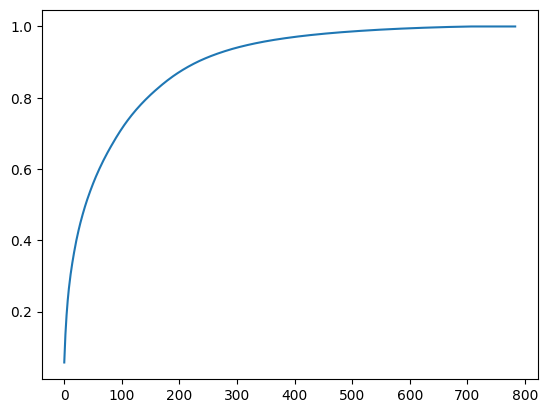

In [70]:
plt.plot(np.cumsum(optimal_pca.explained_variance_ratio_))